In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

mnist_train = pd.read_csv("../../data/train.csv")
data = mnist_train.drop("label",1).values
target = mnist_train["label"].values
indices = np.random.permutation(len(data))

train_data  = data[:-10000]
train_target = target[:-10000]

validation_data = data[-10000:]
validation_target = target[-10000:]

mnist_test = pd.read_csv("../../data/test.csv")
test_data = mnist_test.values

<function matplotlib.pyplot.show>

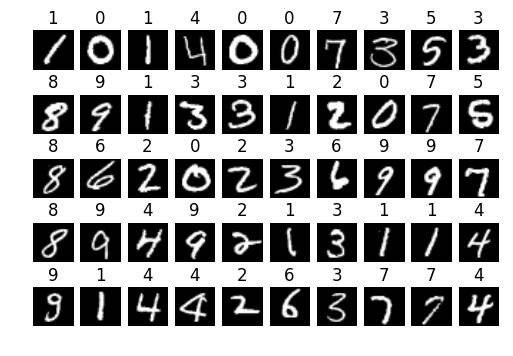

In [72]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_data[i,:].reshape(28,28), cmap='gray')
    plt.title(train_target[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

score = clf.score(validation_data, validation_target)
print(score)

test_predictions = clf.predict(test_data)


0.8523


<function matplotlib.pyplot.show>

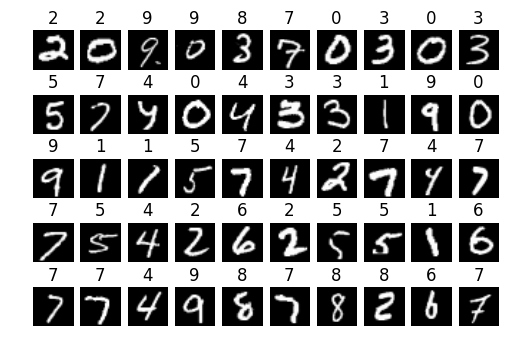

In [80]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_predictions[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [12]:
from sklearn.ensemble import RandomForestClassifier
randclf = RandomForestClassifier(n_estimators = 200)
randclf.fit(data,target)

randscore = randclf.score(validation_data, validation_target)
print(randscore)

test_pred = randclf.predict(test_data)

1.0


<function matplotlib.pyplot.show>

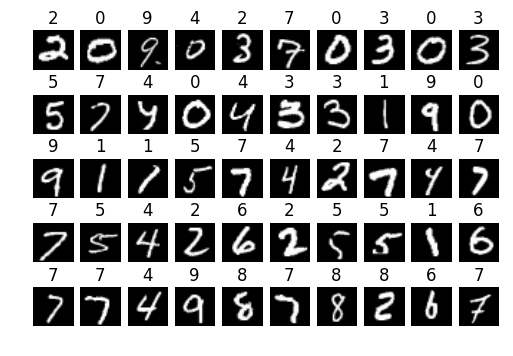

In [6]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_pred[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [15]:
df = pd.DataFrame({'ImageId' : np.arange(1, test_pred.size + 1),
                   'Label'   : test_pred})
df.to_csv('../../submission/submission.csv',index=False)